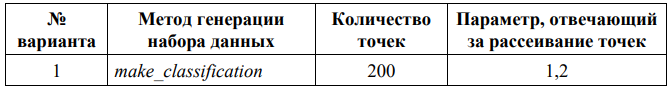

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

**Задание 1**

In [6]:
df = pd.read_csv("Вариант1.csv", sep=';')
df.head()

,f1,f2,f3,f4,f5,f6,y
0,21.232797,36.121405,61.655109,19.077266,29.059668,82.887906,7398.285599
1,31.186627,24.112370,56.210630,10.523992,19.826534,87.397257,6643.842987
2,31.353036,52.778519,30.649668,17.369990,19.703943,62.002705,5003.046270
3,32.543464,38.143889,43.302435,5.472980,33.785272,75.845899,5586.229890
4,35.411079,47.795013,57.483116,9.397280,19.453235,92.894196,6909.852920


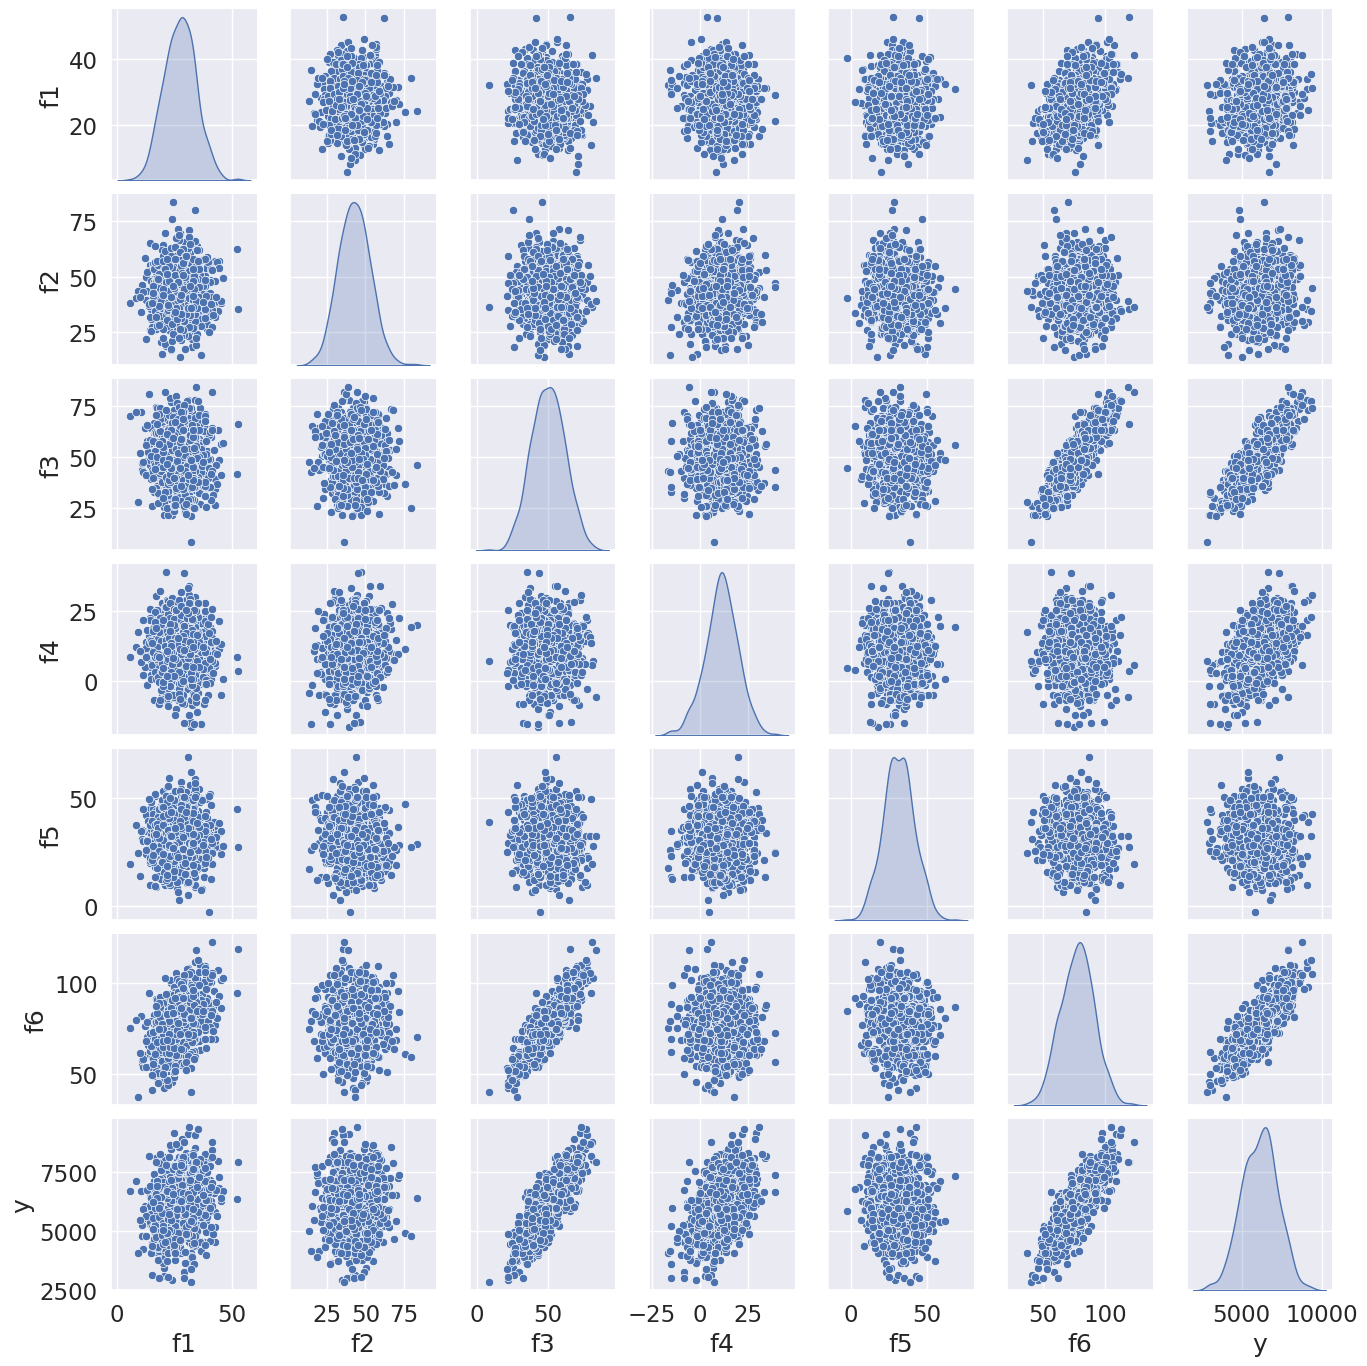

In [7]:
sns.set(font_scale=1.5)
sns.pairplot(df, diag_kind='kde', height = 2)

Как можно заметить на графике, у нас есть следующие зависимости:

1. f3 - y
2. f3 - f6
3. f6 - y

Во всех этих случаях наблюдаетс довольно сильная зависимость, с рассеянием

In [9]:
df.corr()

,f1,f2,f3,f4,f5,f6,y
f1,1.000000,0.009594,-0.052351,-0.041943,0.004424,0.473123,0.204991
f2,0.009594,1.000000,0.010072,0.110799,-0.102044,0.013868,0.067490
f3,-0.052351,0.010072,1.000000,-0.023433,-0.093793,0.855020,0.824168
f4,-0.041943,0.110799,-0.023433,1.000000,-0.010342,-0.042454,0.471663
f5,0.004424,-0.102044,-0.093793,-0.010342,1.000000,-0.080447,-0.081435
f6,0.473123,0.013868,0.855020,-0.042454,-0.080447,1.000000,0.833540
y,0.204991,0.067490,0.824168,0.471663,-0.081435,0.833540,1.000000


In [12]:
df.iloc[:, :6].corrwith(df['y'])

f1    0.204991
f2    0.067490
f3    0.824168
f4    0.471663
f5   -0.081435
f6    0.833540
dtype: float64

Итак, мы видим, что наша гипотеза подтвердилась:
между признаками f3 и f6 наблюдается корреляция 0.85. Между этими же признаками и прогнозируемым признаком налюдаетюся корреляции 0.82 и 0.83 соответственно.

Однако, помимо этих корреляций, у нас обнаружились новые:

1. f1 коррелирует с признаком f6 (0.47), и слабо коррелирует с признаком y (0.2)

2. f4 коррелирует с признаком y (0.47)

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

df_shuffled = shuffle(df, random_state=1)# Создание набора данных с перемешанными записями (строками)

# Масштабирование входных признаков в наборе с перемешанными записями
scaler = StandardScaler()
X = df_shuffled.iloc[:, :6]  # Сохранение в отдельном объекте масштабированных значений
y = df_shuffled['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [108]:
X_sc_train = scaler.fit_transform(X_train)

In [109]:
from sklearn.linear_model import LinearRegression

# Создание объекта-модели (экземпляра класса с настройками по умолчанию)
model = LinearRegression()

# Обучение модели на обучающих данных
model.fit(X_sc_train, y_train)

# Вывод весов признаков и bias, полученных по результатам обучения
print("Веса признаков: ", end='\n')
for coef in model.coef_:
  print(round(coef,4), end='\n')
print()
print("Bias ", model.intercept_)

Веса признаков: 
-12817211182072.656
0.5859
-22018332714202.703
558.8037
2.8621
24782821086279.24

Bias  6139.3892557441695


In [132]:
pairs = zip(df_shuffled.columns[:12], model.coef_)
lst = [pair for pair in pairs]    # формирование списка для вывода на печать
print(lst)

[('f1', -12817211182072.656), ('f2', 0.5859375), ('f3', -22018332714202.703), ('f4', 558.8037109375), ('f5', 2.862060546875), ('f6', 24782821086279.24)]


Уравнение выглядит довольно громоздким - коэффициенты просто гигнатские! Применять регуляризацию будем далее, а пока работаем с этими данными

**y = -12817211182072.656 * x₁ + 0.5859 * x₂ - 22018332714202.703 * x₃ + 558.8037 * x₄ + 2.8621 * x₅ + 24782821086279.24 * x₆ + 6139.38926**

In [133]:
y_pred = model.predict(X_sc_train)
y_pred[:10]

array([5713.83847449, 5479.10409949, 5678.91537879, 8609.08456824,
       8109.56113074, 3875.40097449, 5972.95248817, 4749.61581824,
       8901.18613074, 6102.12753699])

А теперь, оценим качество прогнозов на обучающей выборке, используя метрики MSE, MAE и R^2:

In [135]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#вычисление MSE
mean_squared_error(y_true=y_train, y_pred=y_pred)**0.5

90.49884075356033

In [136]:
#вычисление MAE
mean_absolute_error(y_true=y_train, y_pred=y_pred)

79.1409247242812

In [137]:
#вычисление r2
r2_score(y_true=y_train, y_pred=y_pred)

0.9933701597802355

Text(0.5, 1.0, 'Оценка качества прогноза линейной модели')

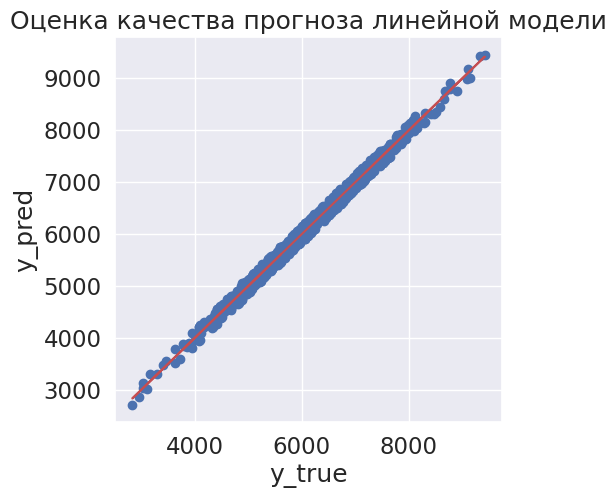

In [138]:
plt.figure(figsize=(5, 5))
plt.plot(y_train, y_train, 'r')     # биссектриса
plt.scatter(y_train, y_pred)        # точки (ответ, прогноз)
plt.xlabel("y_true")
plt.ylabel("y_pred")
plt.title("Оценка качества прогноза линейной модели")

А теперь, сделаем всё то же самое для тестовой выборки:

In [139]:
X_sc_test = scaler.transform(X_test)

In [140]:
y_pred2 = model.predict(X_sc_test)

In [141]:
#вычисление MSE
mean_squared_error(y_true=y_test, y_pred=y_pred2)**0.5

1483263029712.102

In [142]:
#вычисление MAE
mean_absolute_error(y_true=y_test, y_pred=y_pred2)

1217195949854.6858

In [143]:
#вычисление r2
r2_score(y_true=y_test, y_pred=y_pred2)

-1.8729537417396288e+18

Text(0.5, 1.0, 'Оценка качества прогноза линейной модели')

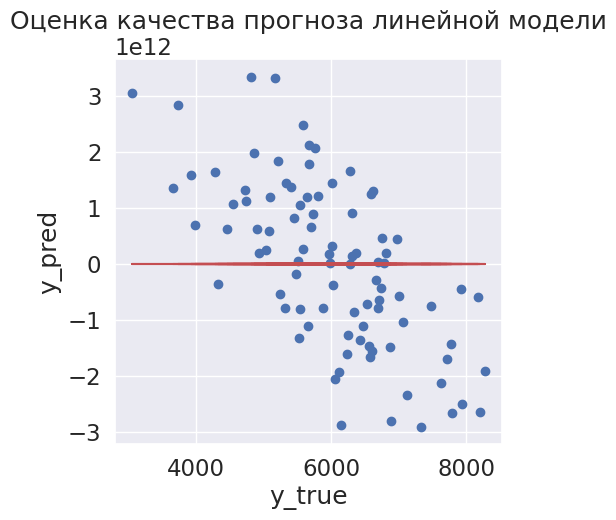

In [144]:
plt.figure(figsize=(5, 5))
plt.plot(y_test, y_test, 'r')       # биссектриса
plt.scatter(y_test, y_pred2)        # точки (ответ, прогноз)
plt.xlabel("y_true")
plt.ylabel("y_pred")
plt.title("Оценка качества прогноза линейной модели")

ОБУЧАЮЩАЯ:
1. MSE: 90.5041403105196
2. MAE: 79.12363852248006
3. R^2: 0.9933693832786951

ТЕСТОВАЯ:
1. MSE: 1483263029712.102
2. MAE: 1217195949854.6858
3. R^2: -1.8729537417396288e+18

Из обеих оценок видно, что модель получилась никакой! Она очень точно предсказала значения обучающей выборки, но на тестовой выборке ошибки стали огромными. Из графикова видно, что модель совершенно не предсказывает новые данные.**Обобщающая способность у модели совсем не развита!**

Теперь исследуем возможности применения регуляризации модели:

In [145]:
from sklearn.linear_model import Ridge
model_ridge =  Ridge(alpha = 5)  # создание экземпляра класса Ridge с коэф.регул.=5
model_ridge.fit(X_sc_train, y_train)   # Обучение модели на всех имеющихся данных

Ridge(alpha=5)

In [146]:
# Коэффициенты модели
print("коэффициенты MR:", model_ridge.coef_)

коэффициенты MR: [ 48.6570667    1.08579733 512.99613659 555.24519078   2.50996621
 480.93667282]


Ииак, мы видим, что коэффициенты действительно стали намного меньше, и выглядят правильными!

In [157]:
y_pred_ridge1 = model_ridge.predict(X_sc_train)
y_pred_ridge2 = model_ridge.predict(X_sc_test)

MSE = mean_squared_error(y_true=y_train, y_pred=y_pred_ridge1)**0.5
MAE = mean_absolute_error(y_true=y_train, y_pred=y_pred_ridge1)
R2 = r2_score(y_true=y_train, y_pred=y_pred_ridge1)

MSE_t = mean_squared_error(y_true=y_test, y_pred=y_pred_ridge2)**0.5
MAE_t = mean_absolute_error(y_true=y_test, y_pred=y_pred_ridge2)
R2_t = r2_score(y_true=y_test, y_pred=y_pred_ridge2)
print("Обучающая")
print("ridge MSE:\t", MSE)
print("ridge MAE:\t", MAE)
print("ridge R2:\t", R2)
print()
print("Тестовая")
print("ridge MSE:\t", MSE_t)
print("ridge MAE:\t", MAE_t)
print("ridge R2:\t", R2_t)

Обучающая
ridge MSE:	 90.62533698663171
ridge MAE:	 79.09980634600332
ridge R2:	 0.993351612892233

Тестовая
ridge MSE:	 166.20472580541886
ridge MAE:	 138.22841136662225
ridge R2:	 0.9764832423545606


Как мы видим, тестовая выборка теперь имеет адекватные значения, а значит: model_ridge действительно смог исправить ошибку Регуляризации модели.

In [158]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=5)      # создание экземпляра класса Lasso с кэоф. рег. = 5
model_lasso.fit(X_sc_train, y_train)   # Обучение модели на всех имеющихся данных

Lasso(alpha=5)

In [162]:
# Коэффициенты модели
print("коэффициенты ML:", model_lasso.coef_)


коэффициенты ML: [  0.           0.         429.18699294 553.6699227    0.
 572.9393078 ]


Как мы видим, коэффициенты в lasso модели тоже стали меньше, по сравнению с моделью обычной регрессии. Но их отличает от ridge_model то, что маленькие значения занулились, а соответствующие им x - выбыли из модели.

In [160]:
y_pred_lasso1 = model_lasso.predict(X_sc_train)
y_pred_lasso2 = model_lasso.predict(X_sc_test)

L_MSE = mean_squared_error(y_true=y_train, y_pred=y_pred_lasso1)**0.5
L_MAE = mean_absolute_error(y_true=y_train, y_pred=y_pred_lasso1)
L_R2 = r2_score(y_true=y_train, y_pred=y_pred_lasso1)

L_MSE_t = mean_squared_error(y_true=y_test, y_pred=y_pred_lasso2)**0.5
L_MAE_t = mean_absolute_error(y_true=y_test, y_pred=y_pred_lasso2)
L_R2_t = r2_score(y_true=y_test, y_pred=y_pred_lasso2)
print("Обучающая")
print("ridge MSE:\t", L_MSE)
print("ridge MAE:\t", L_MAE)
print("ridge R2:\t", L_R2)
print()
print("Тестовая")
print("ridge MSE:\t", L_MSE_t)
print("ridge MAE:\t", L_MAE_t)
print("ridge R2:\t", L_R2_t)

Обучающая
ridge MSE:	 90.83738188157453
ridge MAE:	 79.11634280280546
ridge R2:	 0.9933204647417304

Тестовая
ridge MSE:	 167.49854585330067
ridge MAE:	 139.71981529844544
ridge R2:	 0.9761156850585092


Мы получили схожие с ridge метрики. Так, lasso тоже доказывает свою эффективность в регуляризации. Но помимо прочего, она ещё и упрощает модель, удаляя признаки, которые мало влияют на результат.

**Общие выводы:**

1. Решуляризация помогла нам сделать предсказательную модель правильной
2. Регуляризация необходима в тех случаях. когда коэффициенты получаются слишком большими
3. Существуют разные виды регуляризации, но суть у них у всех одна - исправить коэффициенты, и позволить тем самым правильно обучить модель

**Я выбираю LASSO **, так как:

1. Lasso исправляет коэффициенты, и делает предсказательную модель жизнеспособной.
2. Lasso упрощает модель, удаляя ненужные параметры с маленькими коэффициентами

Уровнение для Lasso:
**y = 429.18699294 * x₃ + 553.6699227 * x₄ + 572.9393078 * x₆ + 6139.38195405**

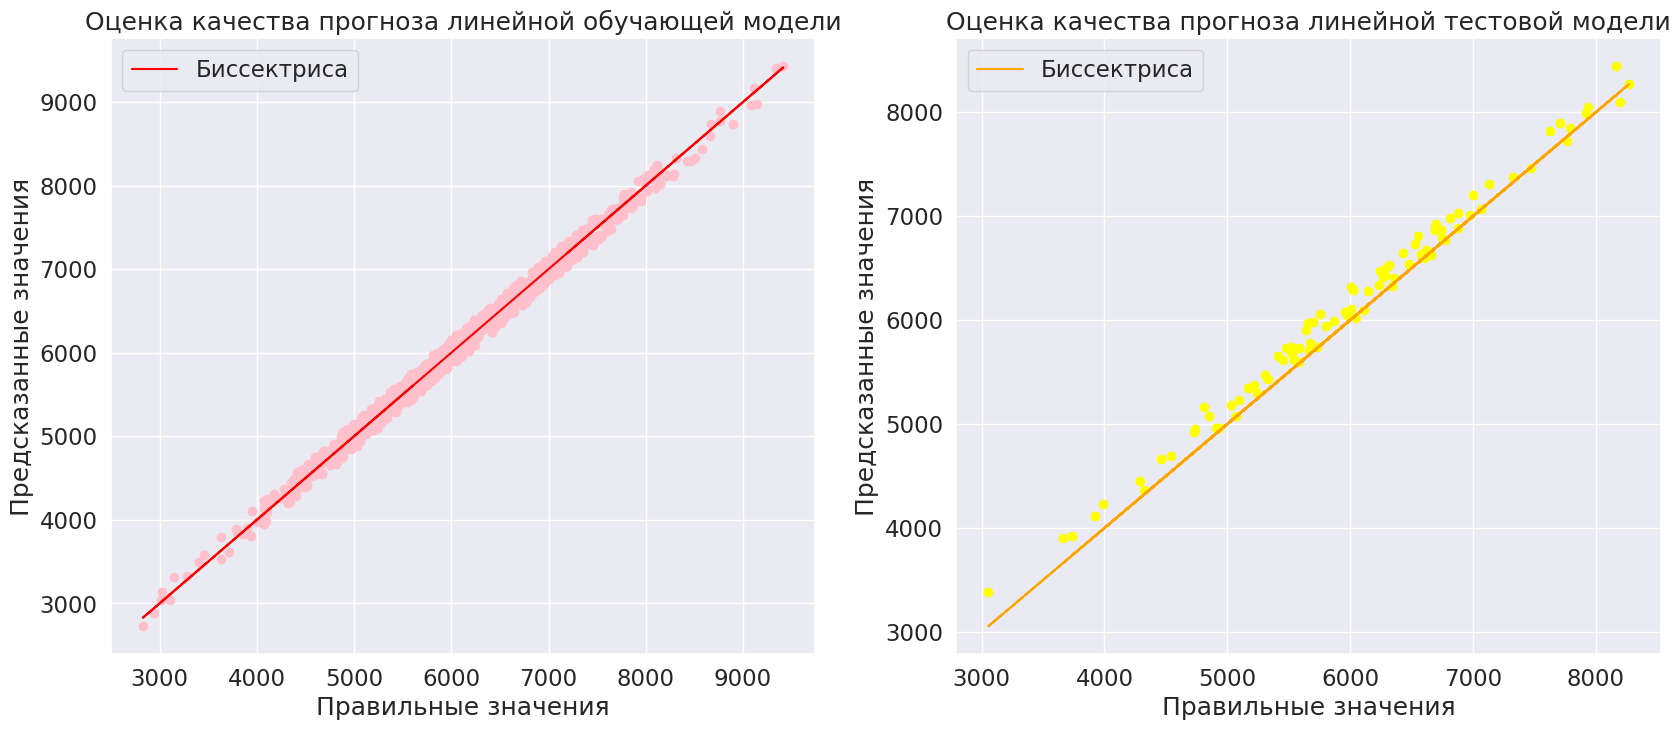

In [166]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 8))

ax[0].plot(y_train, y_train, color='red', label='Биссектриса')                       # биссектриса
ax[0].scatter(y_train, y_pred_lasso1, color='pink')        # точки (ответ, прогноз)
ax[0].set_xlabel("Правильные значения")
ax[0].set_ylabel("Предсказанные значения")
ax[0].set_title("Оценка качества прогноза линейной обучающей модели")
ax[0].legend()

ax[1].plot(y_test, y_test, color='orange', label='Биссектриса')  # биссектриса
ax[1].scatter(y_test, y_pred_lasso2, color='yellow')             # точки (ответ, прогноз)
ax[1].set_xlabel("Правильные значения")
ax[1].set_ylabel("Предсказанные значения")
ax[1].set_title("Оценка качества прогноза линейной тестовой модели")
ax[1].legend()

Ситуация схожая с предыдущей:
На обучающих данных сходство хорошее, но на тестовых наблюдается небольшое отклонение. Это нормально, так как отклонение действительно маленькое.

**Доп. задание**

In [184]:
experimentation = LinearRegression()

results = {}
random_state = [4,19,29,40,2,10,3]
for rs in random_state:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, test_size=0.1, random_state=rs)
    #Масштабирование
    X_sc_train = scaler.fit_transform(X_train)
    X_sc_test = scaler.transform(X_test)

    experimentation.fit(X_sc_train, y_train)  # Обучение модели

    # Прогнозы на обучающей и тестовой выборках
    y_pred_train = experimentation.predict(X_sc_train)
    y_pred_test = experimentation.predict(X_sc_test)

    # Вычисление метрик качества
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    results[rs] = {
        'mse_train': mse_train,
        'mse_test': mse_test,
        'mae_train': mae_train,
        'mae_test': mae_test,
        'r2_train': r2_train,
        'r2_test': r2_test
    }



print("MSE:")
print("\tОбучающая:")
for rs, metrics in results.items():
    print(f"\t\trandom_state={rs}: {metrics['mse_train']:.4f}")
print("\tТестовая:")
for rs, metrics in results.items():
    print(f"\t\trandom_state={rs}: {metrics['mse_test']:.4f}")

print("MAE:")
print("\tОбучающая:")
for rs, metrics in results.items():
    print(f"\t\trandom_state={rs}: {metrics['mae_train']:.4f}")
print("\tТестовая:")
for rs, metrics in results.items():
    print(f"\t\trandom_state={rs}: {metrics['mae_test']:.4f}")

print("R2:")
print("\tОбучающая:")
for rs, metrics in results.items():
    print(f"\t\trandom_state={rs}: {metrics['r2_train']:.4f}")
print("\tТестовая:")
for rs, metrics in results.items():
    print(f"\t\trandom_state={rs}: {metrics['r2_test']:.4f}")


MSE:
	Обучающая:
		random_state=4: 8164.6279
		random_state=19: 8294.9106
		random_state=29: 8103.1427
		random_state=40: 8137.0731
		random_state=2: 8044.4206
		random_state=10: 8137.9404
		random_state=3: 8149.5157
	Тестовая:
		random_state=4: 8653.0755
		random_state=19: 7430.0816
		random_state=29: 9308.7900
		random_state=40: 9030.9729
		random_state=2: 9782.0405
		random_state=10: 8896.4256
		random_state=3: 8841.0402
MAE:
	Обучающая:
		random_state=4: 79.0086
		random_state=19: 79.7445
		random_state=29: 78.5132
		random_state=40: 78.8375
		random_state=2: 78.5071
		random_state=10: 78.7852
		random_state=3: 78.8382
	Тестовая:
		random_state=4: 81.7012
		random_state=19: 74.1869
		random_state=29: 85.6747
		random_state=40: 83.4825
		random_state=2: 86.8192
		random_state=10: 83.5876
		random_state=3: 82.9607
R2:
	Обучающая:
		random_state=4: 0.9934
		random_state=19: 0.9933
		random_state=29: 0.9933
		random_state=40: 0.9933
		random_state=2: 0.9934
		random_state=10: 0.9934
		

**Выводы:**

1. Выбор random_state действительно влияет на разбиение данных, поэтому следует относится к нему серьёзно

2. Кросс-валидация уменьшает влияние конкретного разбиения данных, ведь при ней модель оценивается на нескольких разных разбиениях. Поэтому, её использование необходимо, если мы хотим получить надёжную оценку.

3. Если при разных random_state оценки сильно меняются - то модель явно переобучена, или просто нестабильна

**Задание 2**

In [169]:
from sklearn.linear_model import SGDRegressor

# Список значений коэффициента регуляризации
alpha_values = [0.01, 0.1, 0.5, 1, 5, 10, 15]

# Обучение моделей с L2-регуляризацией
l2_models = {}                                        # Создаем словарь
for alpha in alpha_values:
    model = SGDRegressor(penalty="l2", alpha=alpha)
    model.fit(X_sc_train, y_train)                                   # Обучение модели
    l2_models[alpha] = model

# Обучение моделей с L1-регуляризацией
l1_models = {}                                        # Создаем словарь
for alpha in alpha_values:
    model = SGDRegressor(penalty="l1", alpha=alpha)
    model.fit(X_sc_train, y_train)                                    # Обучение модели
    l1_models[alpha] = model

In [171]:
print("l1 - коэффициенты")
for alpha, model in l1_models.items():
  print(f"  Коэффициенты alpha={alpha}: {model.coef_}\n")
print('--------------------------------------------------------------------')
print("l2 - коэффициенты")
for alpha, model in l2_models.items():
  print(f"  Коэффициенты alpha={alpha}: {model.coef_}\n")

l1 - коэффициенты
  Коэффициенты alpha=0.01: [ 48.38186825   0.         515.06670001 559.12362455   2.7410264
 482.74953205]

  Коэффициенты alpha=0.1: [4.80764260e+01 5.48179475e-01 5.15182554e+02 5.58600249e+02
 2.28004088e+00 4.83172927e+02]

  Коэффициенты alpha=0.5: [ 47.79707403   0.         513.67234514 558.15616624   2.20287163
 484.52861901]

  Коэффициенты alpha=1: [ 45.89485305   0.         510.46151394 558.15194767   1.57887828
 485.59475501]

  Коэффициенты alpha=5: [ 36.1512812    0.         497.60000567 554.13199295   0.
 496.65524109]

  Коэффициенты alpha=10: [ 23.36239808   0.         480.71598426 548.23099531   0.
 510.90547814]

  Коэффициенты alpha=15: [ 16.77663038   0.         474.2991943  543.03431474   0.
 514.35228923]

--------------------------------------------------------------------
l2 - коэффициенты
  Коэффициенты alpha=0.01: [ 48.2423324    1.48229229 511.35636735 553.13437705   2.84658107
 479.26532469]

  Коэффициенты alpha=0.1: [ 50.7160216    8.2550

In [174]:
print("l1")
for alpha, model in l1_models.items():
  y_pred_train = model.predict(X_sc_train)
  y_pred_test = model.predict(X_sc_test)
  print(f"L2 model, alpha={alpha}:")
  print(f"  MSE (обучение): {mean_squared_error(y_train, y_pred_train)}")
  print(f"  MSE (тест): {mean_squared_error(y_test, y_pred_test)}")
  print(f"  MAE (обучение): {mean_absolute_error(y_train, y_pred_train)}")
  print(f"  MAE (тест): {mean_absolute_error(y_test, y_pred_test)}")
  print(f"  R² (обучение): {r2_score(y_train, y_pred_train)}")
  print(f"  R² (тест): {r2_score(y_test, y_pred_test)}")
  print("#######################################")

l1
L2 model, alpha=0.01:
  MSE (обучение): 8190.651334543735
  MSE (тест): 27551.734382478484
  MAE (обучение): 79.15277766992114
  MAE (тест): 138.06926979825434
  R² (обучение): 0.9933696650486002
  R² (тест): 0.9765447724808097
#######################################
L2 model, alpha=0.1:
  MSE (обучение): 8191.522393738624
  MSE (тест): 27595.0968834324
  MAE (обучение): 79.14783627707715
  MAE (тест): 138.2429924800608
  R² (обучение): 0.9933689599258952
  R² (тест): 0.9765078572974838
#######################################
L2 model, alpha=0.5:
  MSE (обучение): 8191.748478644401
  MSE (тест): 27497.579227649836
  MAE (обучение): 79.12268660611704
  MAE (тест): 138.00877809392048
  R² (обучение): 0.9933687769100896
  R² (тест): 0.976590875621186
#######################################
L2 model, alpha=1:
  MSE (обучение): 8195.924032646697
  MSE (тест): 27530.445042293784
  MAE (обучение): 79.14012709645807
  MAE (тест): 137.98080444422217
  R² (обучение): 0.9933653967977503
  R² (

In [175]:
print("l2")
for alpha, model in l2_models.items():
  y_pred_train = model.predict(X_sc_train)
  y_pred_test = model.predict(X_sc_test)
  print(f"L2 model, alpha={alpha}:")
  print(f"  MSE (обучение): {mean_squared_error(y_train, y_pred_train)}")
  print(f"  MSE (тест): {mean_squared_error(y_test, y_pred_test)}")
  print(f"  MAE (обучение): {mean_absolute_error(y_train, y_pred_train)}")
  print(f"  MAE (тест): {mean_absolute_error(y_test, y_pred_test)}")
  print(f"  R² (обучение): {r2_score(y_train, y_pred_train)}")
  print(f"  R² (тест): {r2_score(y_test, y_pred_test)}")
  print("#######################################")

l2
L2 model, alpha=0.01:
  MSE (обучение): 8263.114267847803
  MSE (тест): 27856.89890514992
  MAE (обучение): 79.13669355816816
  MAE (тест): 138.787057815708
  R² (обучение): 0.9933110062802383
  R² (тест): 0.9762849810930634
#######################################
L2 model, alpha=0.1:
  MSE (обучение): 13333.216101328335
  MSE (тест): 33198.939008099034
  MAE (обучение): 93.79446970585103
  MAE (тест): 151.511719270497
  R² (обучение): 0.9892067571771289
  R² (тест): 0.971737217809203
#######################################
L2 model, alpha=0.5:
  MSE (обучение): 82943.50144658063
  MSE (тест): 102464.00333173937
  MAE (обучение): 231.81828141615338
  MAE (тест): 250.62077714197375
  R² (обучение): 0.9328572082767853
  R² (тест): 0.912770772347406
#######################################
L2 model, alpha=1:
  MSE (обучение): 194704.47015860715
  MSE (тест): 209484.30730704384
  MAE (обучение): 356.5070895948936
  MAE (тест): 354.65631633241827
  R² (обучение): 0.8423866673164523
  R² (

**Влияние метода Регуляризации:**

      - L2-метод: Этот подход приводит к уменьшению величины параметров модели, но не обнуляет их полностью. Наблюдается плавное изменение величины параметров при увеличении коэффициента регуляризации (alpha).
      - L1-метод:  В отличие от L2, данный метод способен обнулять некоторые параметры, что фактически выполняет отбор наиболее важных признаков. Изменение величины параметров происходит более резко при изменении alpha.


---



**Влияние Коэффициента Регуляризации (alpha):**

    - Повышение alpha:  И L1, и L2 методы демонстрируют снижение величины параметров и общей сложности модели при увеличении alpha.
    - Низкие значения alpha: Модели с такими параметрами близки по поведению к моделям без регуляризации.
    - Высокие значения alpha: Модели становятся проще, но возникает риск недообучения.



---



 **Оценка Качества Моделей:**

    - L1 и L2: Оба метода регуляризации улучшают способность модели к обобщению по сравнению с моделью без регуляризации.
    - Выбор Оптимальной Модели: Зависит от конкретной задачи и предпочтений.  L1 метод (Lasso) может быть предпочтительнее, когда важен отбор признаков и интерпретируемость модели.  L2 метод (Ridge) может быть более эффективным при наличии мультиколлинеарности в данных.

In [177]:
from sklearn.linear_model import RidgeCV
#берём сетку значений alpha из предыдущего эксперимента
alpha_values = [0.01, 0.1, 0.5, 1, 5, 10, 15]

# Создание объекта RidgeCV
ridge_cv = RidgeCV(alphas=alpha_values, cv=5, scoring="neg_mean_squared_error")
#scoring: "neg_mean_squared_error" значит, что будут исп. отрицательное значение MSE, т.к. в большинстве методов оптимизации используется min_функции потерь
#cv - отвечает за кол-во "частей" при кросс-валидации

ridge_cv.fit(X_sc_train, y_train)
optimal_alpha_l2 = ridge_cv.alpha_
print("L2:")
print("Оптимальное alpha: ", optimal_alpha_l2)

L2:
Оптимальное alpha:  0.01


Найденное оптимальное alpha (0.01) означает, что при этом значении, обеспечиваетсянаилучший компромисс между сложностью модели и качеством предсказаний на осонове кросс-валидации

In [179]:
from sklearn.linear_model import LassoCV

# Создание объекта LassoCV
lasso_cv = LassoCV(alphas=alpha_values, cv=5, random_state=1)

# Обучение модели
lasso_cv.fit(X_sc_train, y_train)

# Оптимальное значение alpha
optimal_alpha_l1 = lasso_cv.alpha_
print("L1:")
print("Оптимальное alpha: ", optimal_alpha_l1)

L1:
Оптимальное alpha:  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.004e+05, tolerance: 1.001e+05
  model = cd_fast.enet_coordinate_descent(


Найденное оптимальное alpha (1.0) означает, что при этом значении, обеспечиваетсянаилучший компромисс между сложностью модели и качеством предсказаний на осонове кросс-валидации

**ВЫВОД:**

1.  коэффициент регуляризации - важный параметр, если мы хотим правильно построить модель прогноза данных

2.  Оба метода регуляризации - крайне эффективны и покрывают огромное поле возможностей для использования регуляризации

3.  опитмальное знаечние alpha позволяет найти компромисс в построении модели, и зависит от конкретных данных